In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [4]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)=mnist.load_data()

In [5]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

In [6]:
x_Train_normalize = x_Train /255
x_Test_normalize = x_Test /255

In [7]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=1000,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

In [11]:
model.add(Dropout(0.5))

In [12]:
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

In [13]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

In [15]:
train_history = model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2,
                         epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 11s - loss: 0.3579 - acc: 0.8930 - val_loss: 0.1623 - val_acc: 0.9543
Epoch 2/10
 - 11s - loss: 0.1604 - acc: 0.9532 - val_loss: 0.1170 - val_acc: 0.9651
Epoch 3/10
 - 11s - loss: 0.1161 - acc: 0.9656 - val_loss: 0.0991 - val_acc: 0.9709
Epoch 4/10
 - 11s - loss: 0.0928 - acc: 0.9724 - val_loss: 0.0905 - val_acc: 0.9732
Epoch 5/10
 - 11s - loss: 0.0757 - acc: 0.9771 - val_loss: 0.0811 - val_acc: 0.9757
Epoch 6/10
 - 11s - loss: 0.0623 - acc: 0.9804 - val_loss: 0.0771 - val_acc: 0.9768
Epoch 7/10
 - 11s - loss: 0.0538 - acc: 0.9840 - val_loss: 0.0779 - val_acc: 0.9768
Epoch 8/10
 - 11s - loss: 0.0491 - acc: 0.9848 - val_loss: 0.0728 - val_acc: 0.9787
Epoch 9/10
 - 11s - loss: 0.0431 - acc: 0.9865 - val_loss: 0.0683 - val_acc: 0.9800
Epoch 10/10
 - 11s - loss: 0.0372 - acc: 0.9888 - val_loss: 0.0670 - val_acc: 0.9809


In [16]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

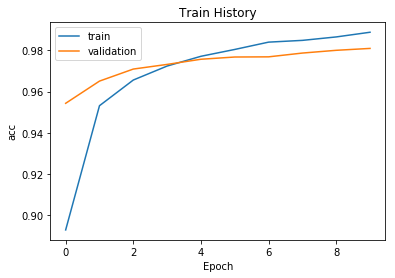

In [17]:
show_train_history(train_history,'acc','val_acc')

In [18]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 144us/step

accuracy= 0.9808
